<a href="https://colab.research.google.com/github/Roborueslbff/SpOoNs/blob/main/SimpleNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [42]:
# create a model class that inherits nn.Module
class Model(nn.Module):
  # input layer (4 features of the flower) -->
  # hidden layer 1( number of neurons) -->
  # H2 (n)... -->
  # output layer (3 classes of iris flower)
  def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [43]:
# pick a manual seed for randomization
torch.manual_seed(41)
# create an instance of the model
model = Model()

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [46]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [47]:
# replaced species names with floats
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-47-1f032c088e6b>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [48]:
# train, test, split; set x, y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [49]:
X = X.values
y = y.values

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=41)

In [52]:
# convert x features into float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [59]:
# convert y labels to tensor labels
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [69]:
# set the criterion of the model to measure the error
criterion = nn.CrossEntropyLoss()
# choose an adam optimiser, and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.015)

In [70]:
# model training
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train) #get predicted answer

  # measure loss, will be high at first
  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())

  if i % 100 ==0:
    print(f'Epoch: {i} and loss: {loss}')

  # now for back propogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 7.421896589221433e-05
Epoch: 100 and loss: 0.0001182870109914802
Epoch: 200 and loss: 8.501460251864046e-05
Epoch: 300 and loss: 8.017009531613439e-05
Epoch: 400 and loss: 7.557616481790319e-05
Epoch: 500 and loss: 7.149805605877191e-05
Epoch: 600 and loss: 6.753288471372798e-05
Epoch: 700 and loss: 6.370800838340074e-05
Epoch: 800 and loss: 6.0036418290110305e-05
Epoch: 900 and loss: 5.651881656376645e-05


Text(0.5, 0, 'epochs')

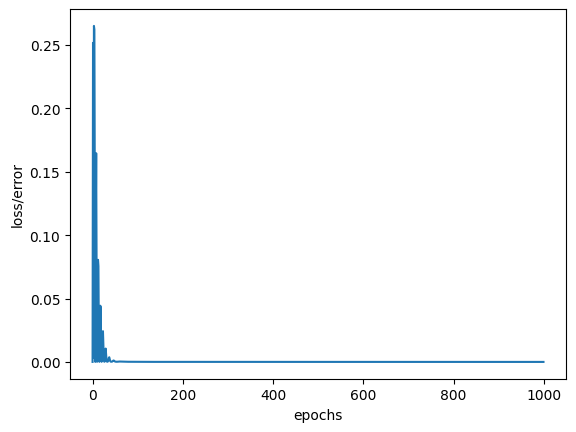

In [71]:
# GRAPHS
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('epochs')